In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* **We need to replace the 0 values with nan**


In [5]:
dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]=dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)

In [6]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
print(dataset.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0            NaN      NaN  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0            NaN            NaN      NaN  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0            NaN      NaN   NaN   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

* **We need to replace Nan values with the mean or median of the column**

In [8]:
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace=True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace=True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace=True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace=True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace=True)


In [9]:
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

* ***Visualising the columns***

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

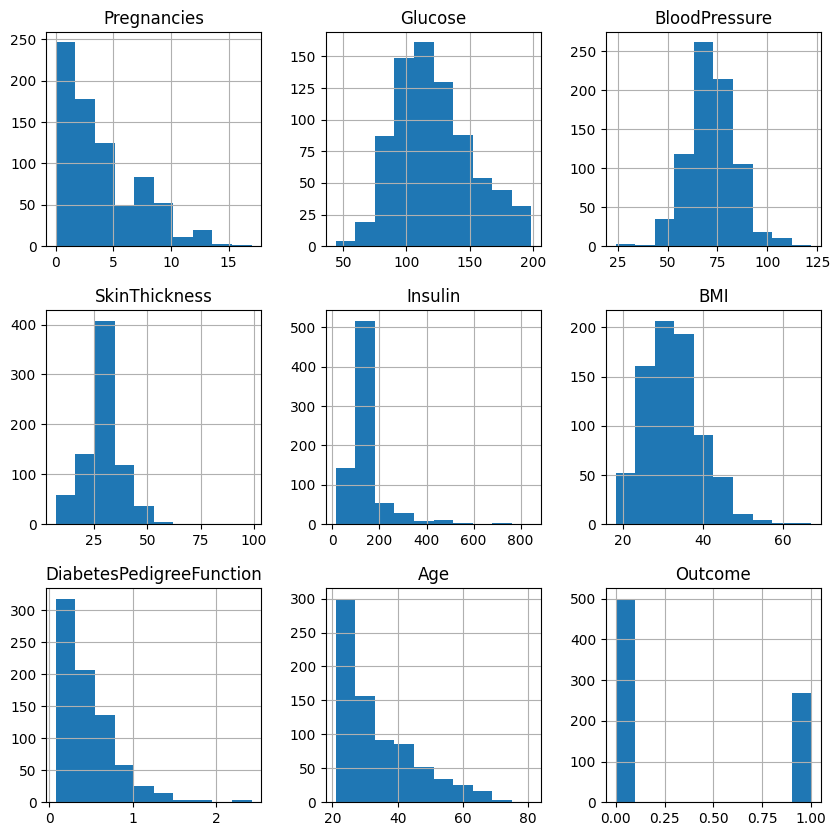

In [10]:
dataset.hist(figsize=(10,10))


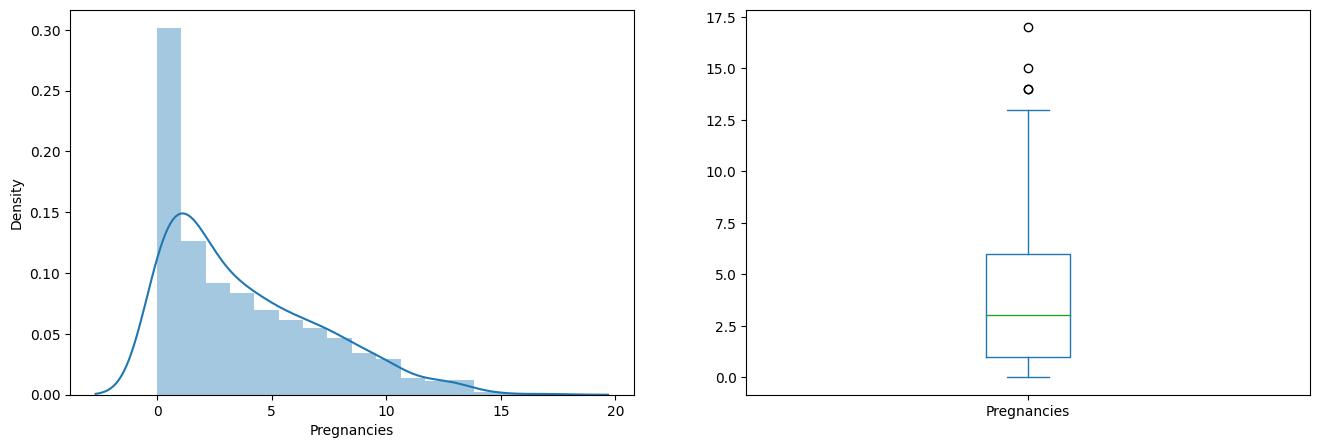

In [11]:
plt.subplot(121)
sns.distplot(dataset['Pregnancies'])
plt.subplot(122)
dataset['Pregnancies'].plot.box(figsize=(16, 5))
plt.show()

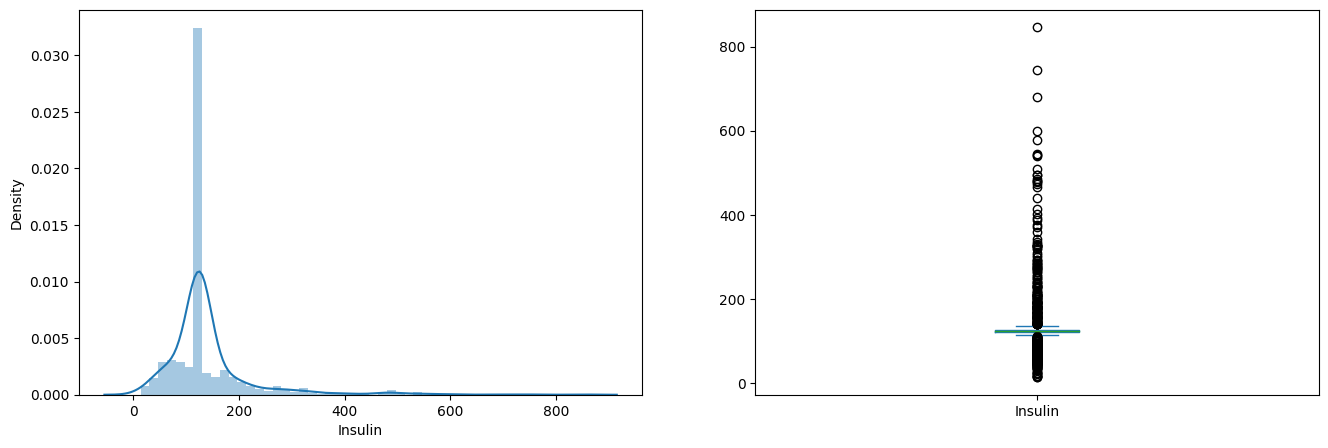

In [12]:
plt.subplot(121)
sns.distplot(dataset['Insulin'])
plt.subplot(122)
dataset['Insulin'].plot.box(figsize=(16, 5))
plt.show()

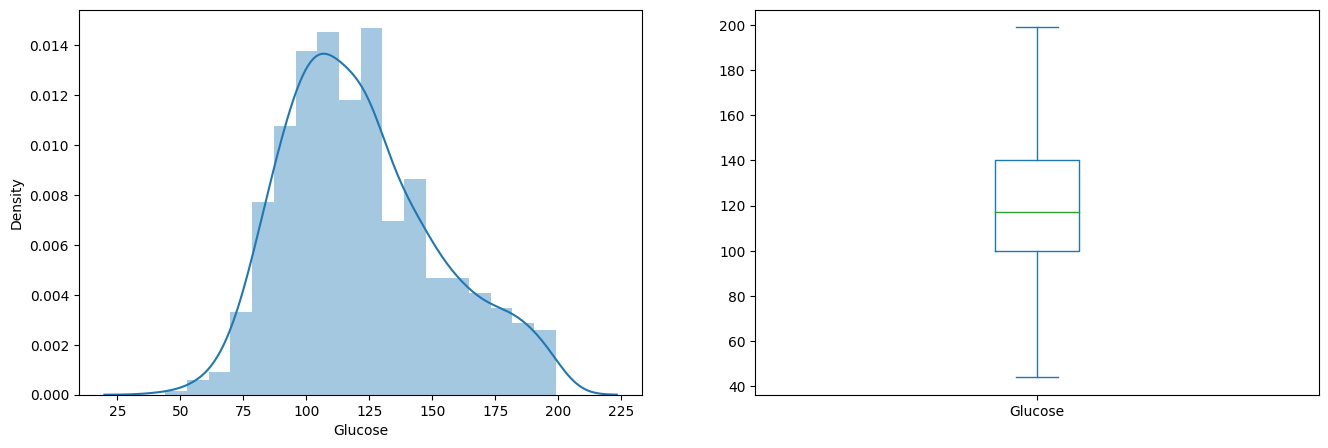

In [13]:
plt.subplot(121)
sns.distplot(dataset['Glucose'])
plt.subplot(122)
dataset['Glucose'].plot.box(figsize=(16, 5))
plt.show()


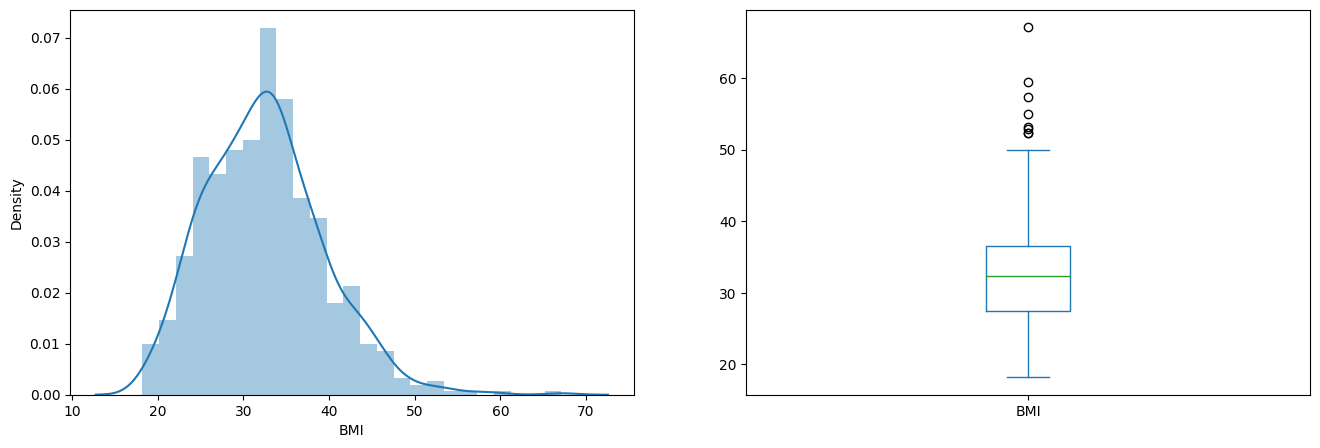

In [14]:
plt.subplot(121)
sns.distplot(dataset['BMI'])
plt.subplot(122)
dataset['BMI'].plot.box(figsize=(16, 5))
plt.show()

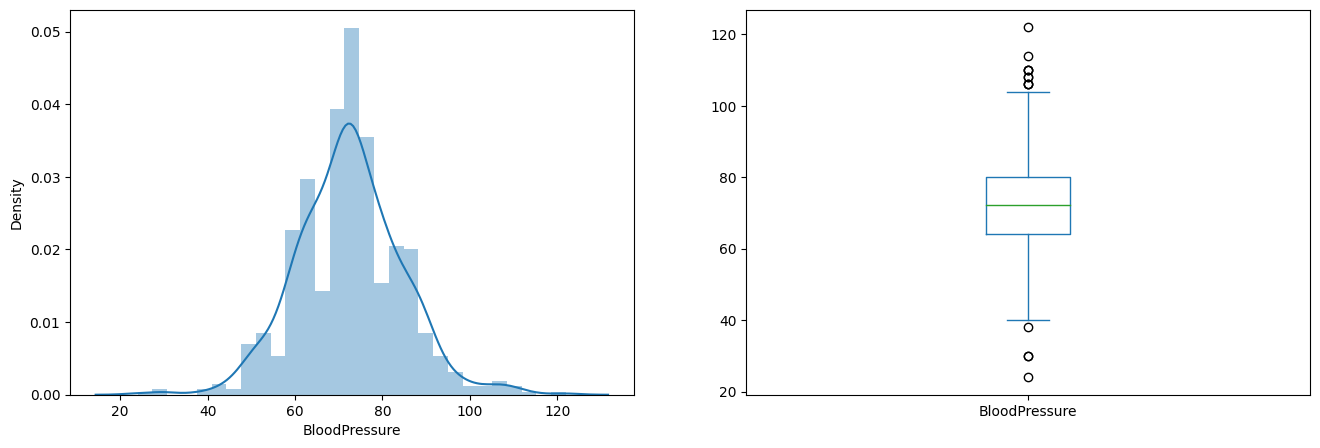

In [15]:
plt.subplot(121)
sns.distplot(dataset['BloodPressure'])
plt.subplot(122)
dataset['BloodPressure'].plot.box(figsize=(16, 5))
plt.show()

* ***Correlation between features***

In [16]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Axes: >

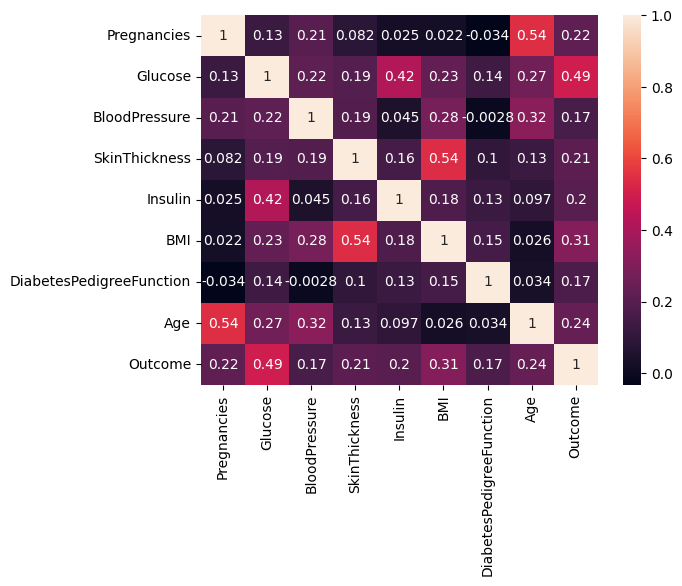

In [17]:
sns.heatmap(dataset.corr(), annot=True)

* **Split Dataset into training set and test set**

In [18]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

* **Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
X_train

array([[ 1.50755225, -1.09966742, -0.91333816, ..., -1.45629684,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.133331  , -1.25078001, ...,  0.09212153,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03302353,  0.60515017, ..., -0.03691333,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93305769, -0.66025677, ..., -1.14087828,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.2329552 ,  0.09898739, ..., -0.3666691 ,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46646402,  0.7738711 , ..., -0.05125054,
         0.51627505,  2.953134  ]])

In [21]:
X_test

array([[-0.82986389,  2.56574658,  0.26770832, ...,  1.46849342,
         2.78665365, -0.96584853],
       [-0.53768687, -0.4998724 ,  0.09898739, ...,  0.13513316,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.53285271, -0.91333816, ...,  0.19248198,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.43322851, -1.08205909, ..., -1.04051783,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.19988846,  0.43642925, ..., -1.65701774,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.13298936,  0.43642925, ..., -0.72509927,
        -0.63396981,  0.28489057]])

In [22]:
y_train

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [23]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

**Logistic** **Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
lr_train = lr.predict(X_train)
print(confusion_matrix(y_train,lr_train))
print(accuracy_score(y_train,lr_train))

[[322  48]
 [ 89 117]]
0.7621527777777778


In [27]:
lr_test= lr.predict(X_test)
print(confusion_matrix(y_test,lr_test))
print(accuracy_score(y_test,lr_test))

[[117  13]
 [ 28  34]]
0.7864583333333334


**K- NEAREST NEIGHBORS**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [29]:
knn_train = knn.predict(X_train)
print(confusion_matrix(y_train,knn_train))
print(accuracy_score(y_train,knn_train))


[[332  38]
 [ 84 122]]
0.7881944444444444


In [30]:
knn_test= knn.predict(X_test)
print(confusion_matrix(y_test,knn_test))
print(accuracy_score(y_test,knn_test))

[[118  12]
 [ 25  37]]
0.8072916666666666


**DECISION TREE CLASSIFIER**

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
dt_train=dt.predict(X_train)
confusion_matrix(y_train,dt_train)
accuracy_score(y_train,dt_train)

1.0

In [34]:
dt_pred=dt.predict(X_test)
confusion_matrix(y_test,dt_pred)
accuracy_score(y_test,dt_pred)

0.7135416666666666

**RANDOM FOREST CLASSIFIER**

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
rfc_train=rfc.predict(X_train)
print(confusion_matrix(y_train,rfc_train))
print(accuracy_score(y_train,rfc_train))

[[370   0]
 [  0 206]]
1.0


In [37]:
rfc_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))

[[116  14]
 [ 29  33]]
0.7760416666666666


**SUPPORT VECTOR MACHINE**

In [38]:
from sklearn.svm import SVC
svc = SVC(C = 0.25,kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)

SVC(C=0.25, random_state=0)

In [39]:
svc_train=svc.predict(X_train)
print(confusion_matrix(y_train,svc_train))
print(accuracy_score(y_train,svc_train))

[[343  27]
 [ 89 117]]
0.7986111111111112


In [40]:
svc_pred=svc.predict(X_test)
print(confusion_matrix(y_test,svc_pred))
print(accuracy_score(y_test,svc_pred))

[[122   8]
 [ 32  30]]
0.7916666666666666


**NAIVE BAYES**

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [42]:
nb_train=nb.predict(X_train)
print(confusion_matrix(y_train,nb_train))
print(accuracy_score(y_train,nb_train))

[[305  65]
 [ 81 125]]
0.7465277777777778


In [43]:
nb_test=nb.predict(X_test)
print(confusion_matrix(y_test,nb_test))
print(accuracy_score(y_test,nb_test))

[[113  17]
 [ 27  35]]
0.7708333333333334


# KNN gives the highest accuracy of 80%

In [44]:
print(np.concatenate((knn_test.reshape(len(knn_test),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

In [45]:
print(confusion_matrix(y_test,knn_test))
acc=accuracy_score(y_test,knn_test)
print("Accuracy: {:.2f} %".format(acc*100))

[[118  12]
 [ 25  37]]
Accuracy: 80.73 %


# Making a new prediction

In [46]:
print("y_pred")
print((knn.predict([X_test[3]])))
print("y_true")
print(y_test[3])

y_pred
[1]
y_true
1


In [47]:
p=knn.predict(sc.transform([[0,137,40,35,168,43.1,2.228,33]]))
print(p)
if p==0:
  print("Not Diabetic")
else:
  print("Diabetic")

[1]
Diabetic
